In [16]:
#black-scholes
import math
from scipy.stats import norm

def blscall(S,K,T,r,vol):
    d1=(math.log(S/K)+(r+vol**2/2)*T)/(vol*T**(1/2))
    d2=d1-vol*T**(1/2)
    c=S*norm.cdf(d1)-K*math.exp(-r*T)*norm.cdf(d2)
    return c

In [17]:
def BisectionBLS(S,K,T,r,call):
    left=1e-8
    right=1
    threshold=1e-5
    while right-left>=threshold:
        middle=(left+right)/2
        if((blscall(S,K,T,r,left)-call)*(blscall(S,K,T,r,middle)-call)<0):
            right=middle
        else:
            left=middle
    return (left+right)/2

In [34]:
import numpy as np
S=13552.46
K=np.arange(13000,15100,100)
T=15/246
r=0.0085
call_price=[675,610,525,448,395,345,289,238,194,153,120,92,69,52,39.5,28,20.5,16,12,9.8,8.5]
imply_vol=[]
for i in range (21):
    imply_vol.append(BisectionBLS(S,K[i],T,r,call_price[i]))
imply_vol
    

[0.24543381491870875,
 0.2522010878002549,
 0.23772049712474824,
 0.22744370279392245,
 0.23267746739002232,
 0.23602677155574803,
 0.230999000609932,
 0.2258567887472916,
 0.22198105636417387,
 0.21616745778949736,
 0.2124748308732986,
 0.20866013364582064,
 0.20501328309635158,
 0.203388222077446,
 0.20331955752735137,
 0.2003288349010086,
 0.20003128851726532,
 0.20297623477687832,
 0.2043724139621353,
 0.20907212094638827,
 0.21575547048892973]

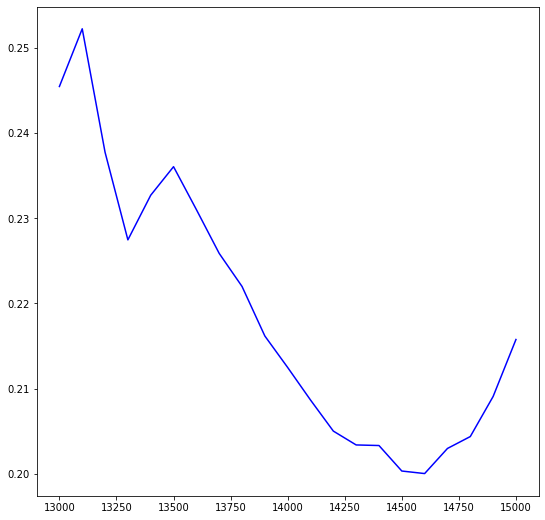

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.plot(K,imply_vol,'b-')